In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd

In [2]:
import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
store_gamma = pd.HDFStore("output_PU_clusters_check_gamma_v3.h5")
store_ele = pd.HDFStore("output_PU_clusters_check_ele_v3.h5")

In [4]:
dfgam = pd.concat([store_gamma['df']])
dfele = pd.concat([store_ele['df']])

In [5]:
dfgam = dfgam[(dfgam.is_seed==1) & (dfgam.simfrac_sig>0.01)]
dfele = dfele[(dfele.is_seed==1) & (dfele.simfrac_sig>0.01)]

In [19]:
dfele.columns

Index(['PUsimen_frac', 'calo_genen', 'calo_genet', 'calo_geneta',
       'calo_genphi', 'calo_simen', 'calo_simet', 'calo_simeta', 'calo_simphi',
       'en', 'et', 'eta', 'ieta', 'iphi', 'is_seed', 'iz', 'nVtx', 'nxtals',
       'nxtals_PU', 'obsPU', 'pass_simfrac_thr', 'phi', 'simen_pu',
       'simen_pu_frac', 'simen_sig', 'simen_sig_frac', 'simfrac_sig', 'wi'],
      dtype='object')

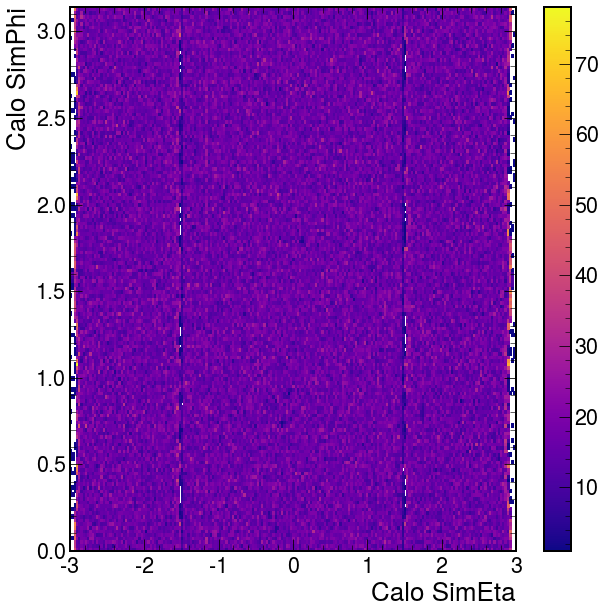

In [26]:
plt.hist2d(dfele.calo_simeta, dfele.calo_simphi, range=((-3,3),(0,3.14)), bins=(200,150), cmap="plasma", cmin=1 )
plt.xlabel("Calo SimEta")
plt.ylabel("Calo SimPhi")
plt.colorbar()

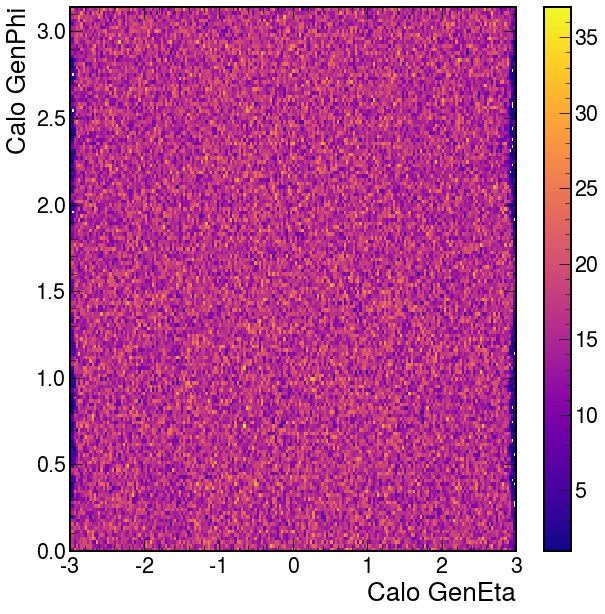

In [27]:
plt.hist2d(dfele.calo_geneta, dfele.calo_genphi, range=((-3,3),(0,3.14)), bins=(200,150), cmap="plasma", cmin=1 )
plt.xlabel("Calo GenEta")
plt.ylabel("Calo GenPhi")
plt.colorbar()

# Seed occupancy

Text(0, 1, 'iphi')

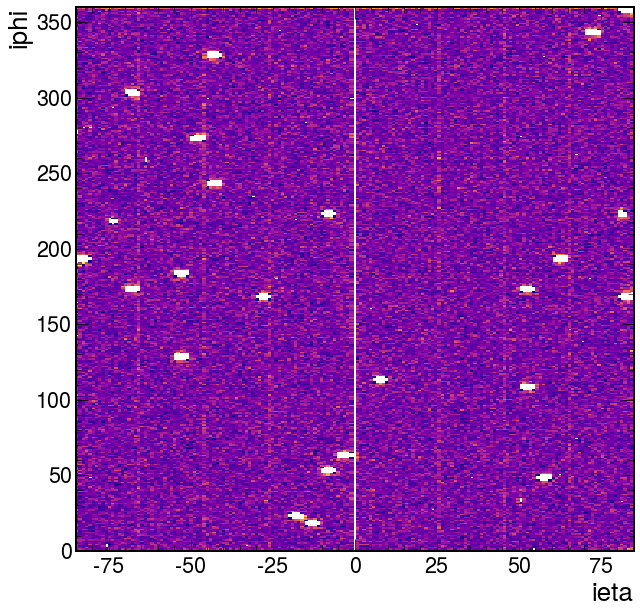

In [28]:
plt.hist2d(dfele[dfele.iz==0].ieta, dfele[dfele.iz==0].iphi, range=((-85,85),(0,360)), bins=(171,360), cmap="plasma", cmin=1 )
plt.xlabel("ieta")
plt.ylabel("iphi")

Text(1, 0, 'iphi')

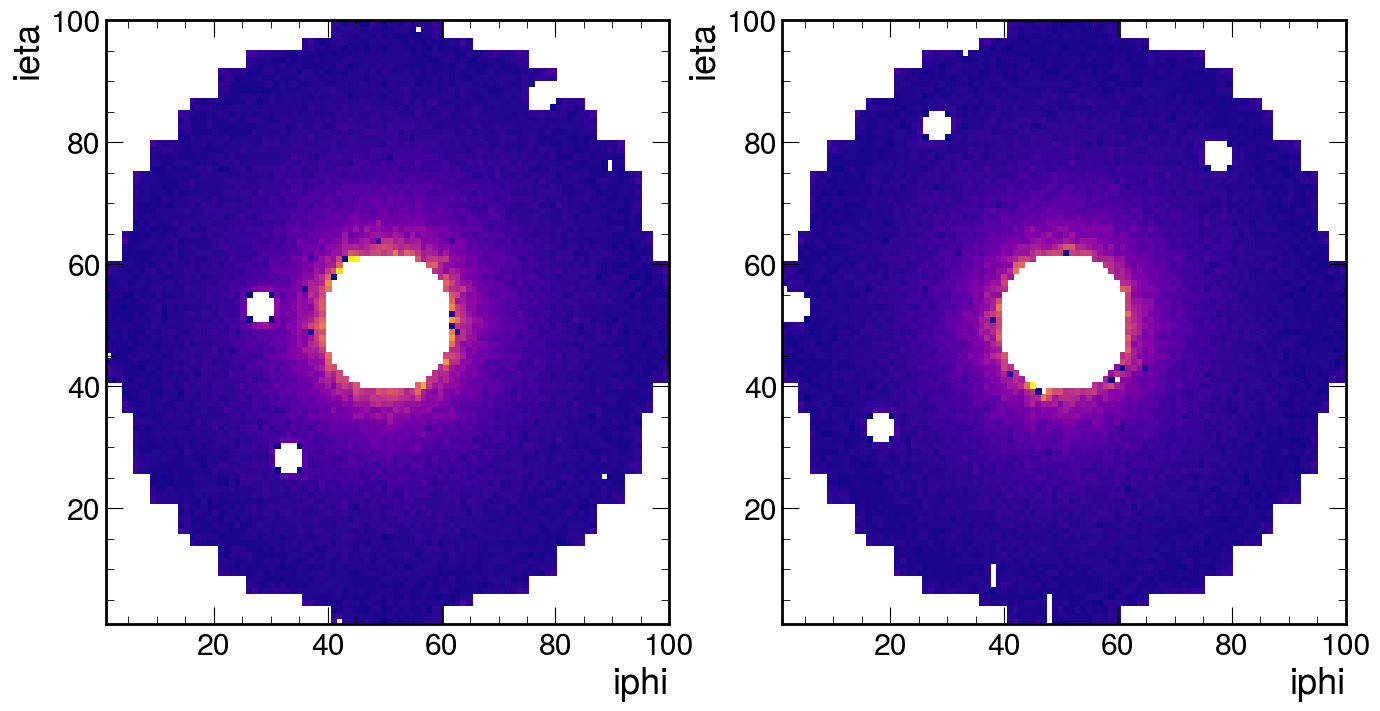

In [29]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfele[dfele.iz==-1].iphi,dfele[dfele.iz==-1].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma", cmin = 1 )
ax[1].hist2d(dfele[dfele.iz==1].iphi,dfele[dfele.iz==1].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma",cmin = 1 )
ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")

# Seed energy

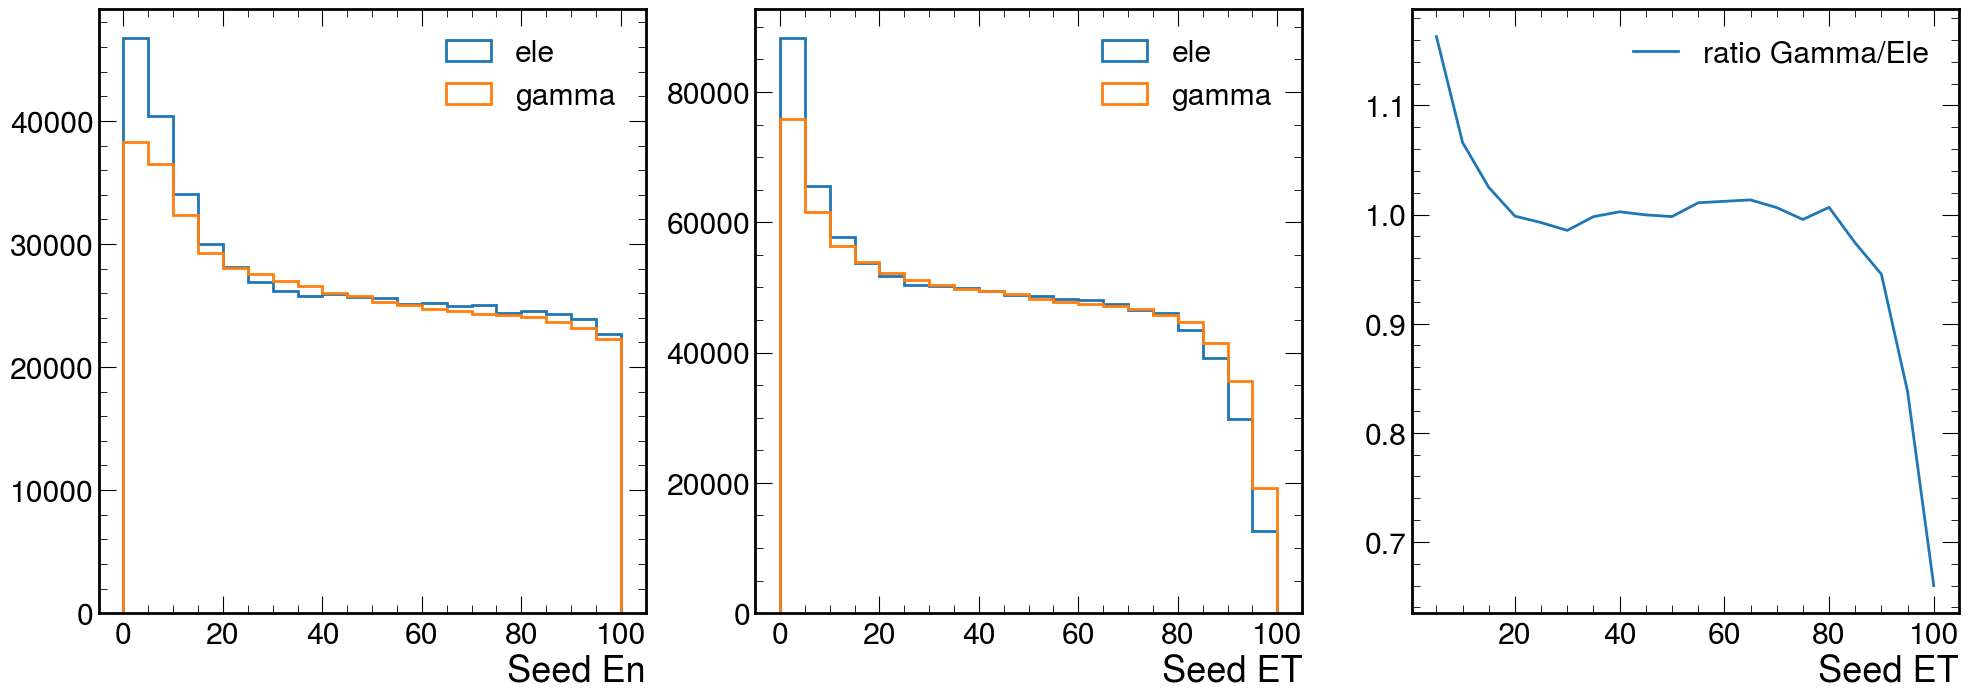

In [34]:
f, ax, = plt.subplots(1,3, figsize=(24,8), dpi=100)

ax[0].hist(dfele.en, histtype="step", linewidth=2, label="ele", bins=20, range=(0,100))
ax[0].hist(dfgam.en, histtype="step", linewidth=2, label="gamma",bins=20, range=(0,100))
ax[0].legend()
ax[0].set_xlabel("Seed En")



he =  ax[1].hist(dfele.et, histtype="step", linewidth=2, label="ele", bins=20, range=(0,100))
hg =  ax[1].hist(dfgam.et, histtype="step", linewidth=2, label="gamma",bins=20, range=(0,100))
ax[1].legend()
# ax[1].set_yscale("log")
ax[1].set_xlabel("Seed ET")
# ax[2].hist(df.ieta)


ax[2].plot(he[1][1:], he[0]/hg[0], linewidth=2, label="ratio Gamma/Ele")

ax[2].set_xlabel("Seed ET")
ax[2].legend()
# ax[2].set_xlabel("Seed ieta")


In [74]:
print("N ele", len(dfele))
print("N gamma", len(dfgam))

N ele 397932
N gamma 396549


In [80]:
print("Frac seed < 1 Et Ele: ", len(dfele[dfele.et<=1])/ len(dfele))
print("Frac seed < 1 Et gamma: ", len(dfgam[dfgam.et<=1])/ len(dfgam))

Frac seed < 1 Et Ele:  0.0319024355920107
Frac seed < 1 Et gamma:  0.026294354543826868


Text(1, 0, 'ieta')

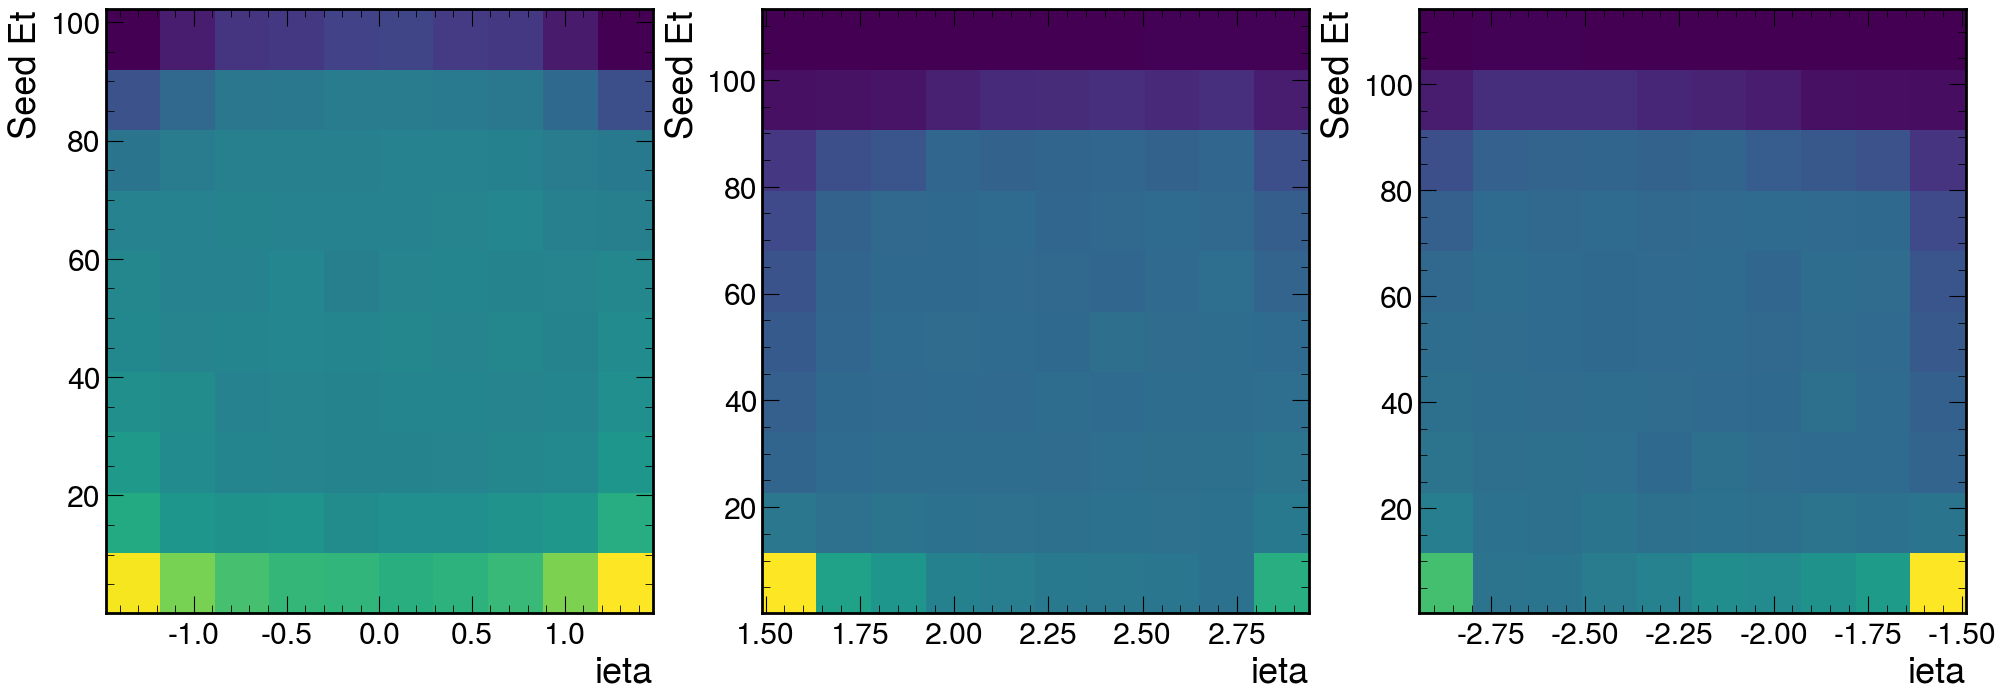

In [35]:
f, ax, = plt.subplots(1,3, figsize=(24,8), dpi=100)

mask = dfele.iz==0
ax[0].hist2d(dfele[mask].eta,dfele[mask].et, )
ax[0].set_ylabel("Seed Et")
ax[0].set_xlabel("ieta")

mask = dfele.iz==1
ax[1].hist2d(dfele[mask].eta,dfele[mask].et, )
ax[1].set_ylabel("Seed Et")
ax[1].set_xlabel("ieta")

mask = dfele.iz==-1
ax[2].hist2d(dfele[mask].eta,dfele[mask].et, )
ax[2].set_ylabel("Seed Et")
ax[2].set_xlabel("ieta")


Text(1, 0, 'Seed ET')

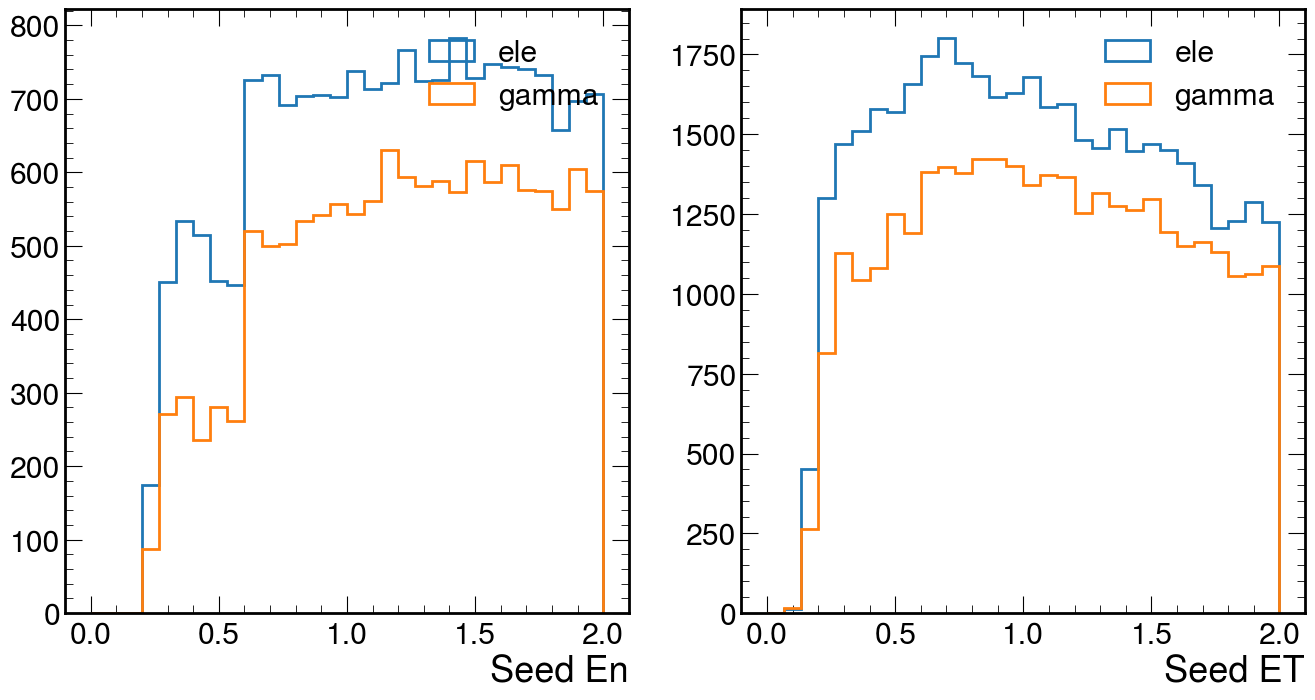

In [36]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist(dfele.en, histtype="step", linewidth=2, label="ele", bins=30, range=(0,2))
ax[0].hist(dfgam.en, histtype="step", linewidth=2, label="gamma",bins=30, range=(0,2))
ax[0].legend()

ax[0].set_xlabel("Seed En")



ax[1].hist(dfele.et, histtype="step", linewidth=2, label="ele", bins=30, range=(0,2))
ax[1].hist(dfgam.et, histtype="step", linewidth=2, label="gamma",bins=30, range=(0,2))
ax[1].legend()
ax[1].set_xlabel("Seed ET")
# ax[2].hist(df.ieta)
# ax[2].set_xlabel("Seed ieta")


# Calo energy

Text(1, 0, 'Calo Clusters Et')

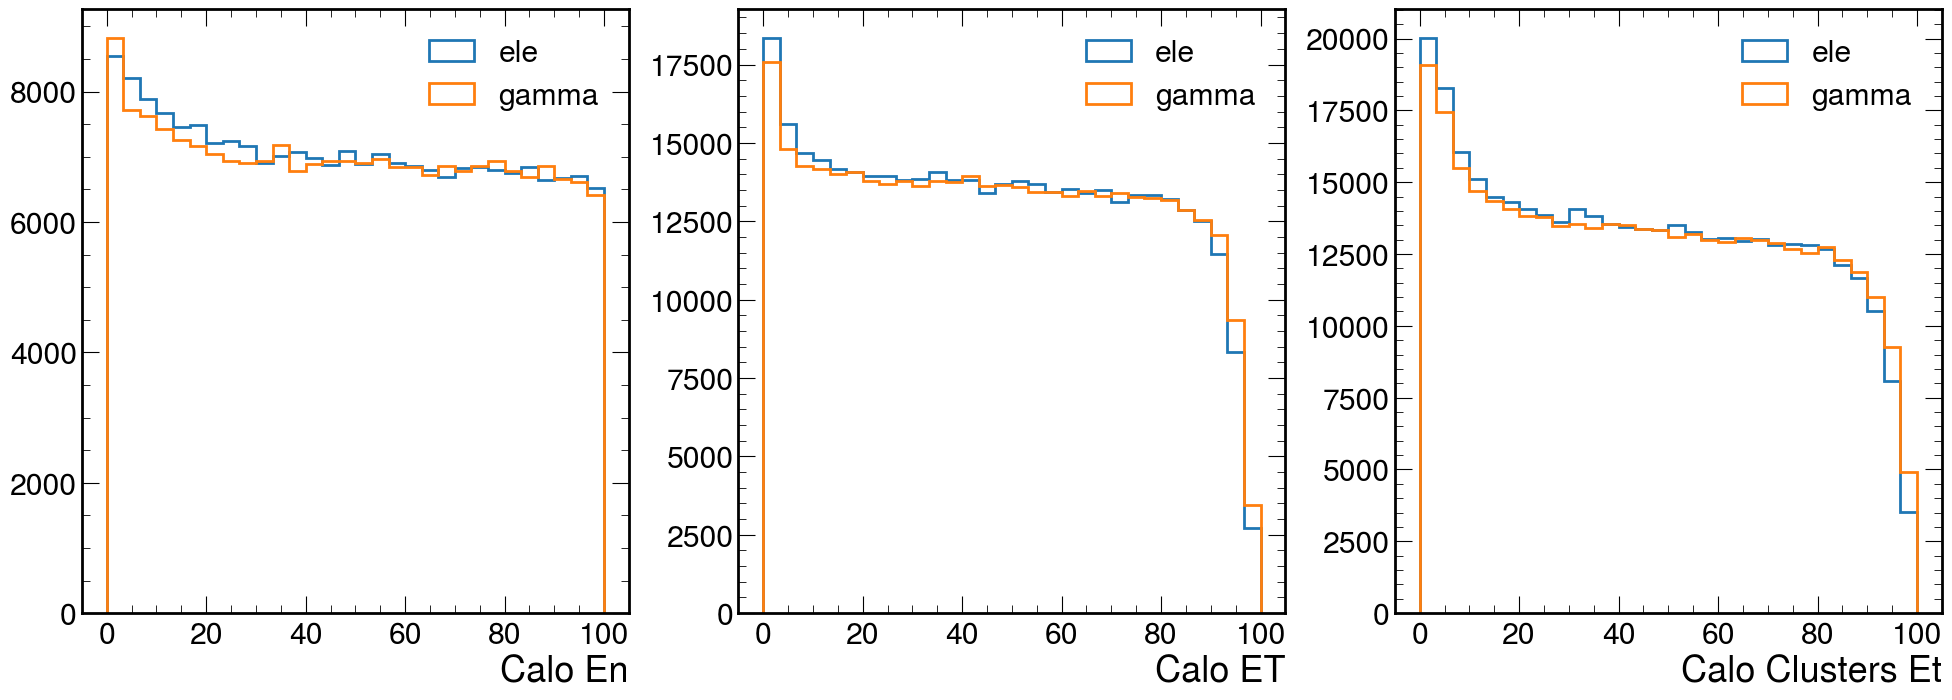

In [42]:
f, ax = plt.subplots(1 ,3, figsize=(24,8), dpi=100)

ax[0].hist(dfele.calo_en, histtype="step", linewidth=2, label="ele", bins=30, range=(0,100))
ax[0].hist(dfgam.calo_en, histtype="step", linewidth=2, label="gamma",bins=30, range=(0,100))
ax[0].legend()
ax[0].set_xlabel("Calo En")

ax[1].hist(dfele.calo_et, histtype="step", linewidth=2, label="ele", bins=30, range=(0,100))
ax[1].hist(dfgam.calo_et, histtype="step", linewidth=2, label="gamma",bins=30, range=(0,100))
ax[1].legend()
ax[1].set_xlabel("Calo ET")



ax[2].hist(dfele.tot_et_clcalo, histtype="step", linewidth=2, label="ele", bins=30, range=(0,100))
ax[2].hist(dfgam.tot_et_clcalo, histtype="step", linewidth=2, label="gamma",bins=30, range=(0,100))
ax[2].legend()
ax[2].set_xlabel("Calo Clusters Et")


# Seed PU fraction

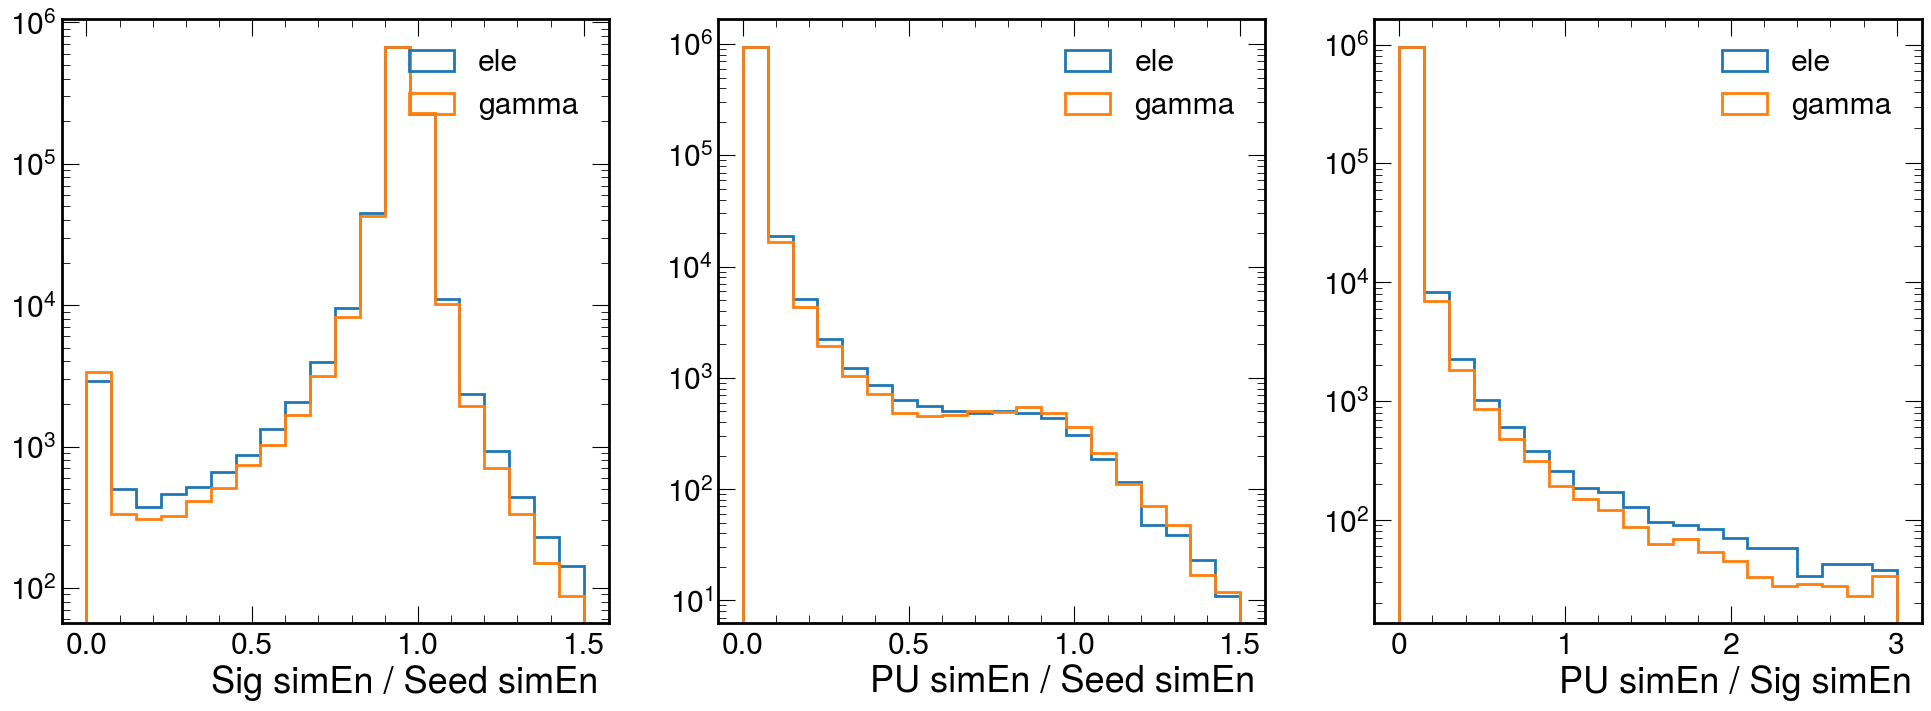

In [38]:
f, ax, = plt.subplots(1,3, figsize=(24,8), dpi=100)

ax[0].hist(dfele.simen_sig_frac, histtype="step", linewidth=2, label="ele", bins=20, range=(0,1.5))
ax[0].hist(dfgam.simen_sig_frac, histtype="step", linewidth=2, label="gamma",bins=20, range=(0,1.5))
ax[0].legend()
ax[0].set_xlabel("Sig simEn / Seed simEn ")
ax[0].set_yscale("log")

ax[1].hist(dfele.simen_pu_frac, histtype="step", linewidth=2, label="ele", bins=20, range=(0,1.5))
ax[1].hist(dfgam.simen_pu_frac, histtype="step", linewidth=2, label="gamma",bins=20, range=(0,1.5))
ax[1].legend()
ax[1].set_xlabel("PU simEn / Seed simEn ")
ax[1].set_yscale("log")



ax[2].hist(dfele.PUsimen_frac, histtype="step", linewidth=2, label="ele", bins=20, range=(0,3))
ax[2].hist(dfgam.PUsimen_frac, histtype="step", linewidth=2, label="gamma",bins=20, range=(0,3))
ax[2].legend()
ax[2].set_xlabel("PU simEn / Sig simEn ")
ax[2].set_yscale("log")



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 1, '$\\eta$')

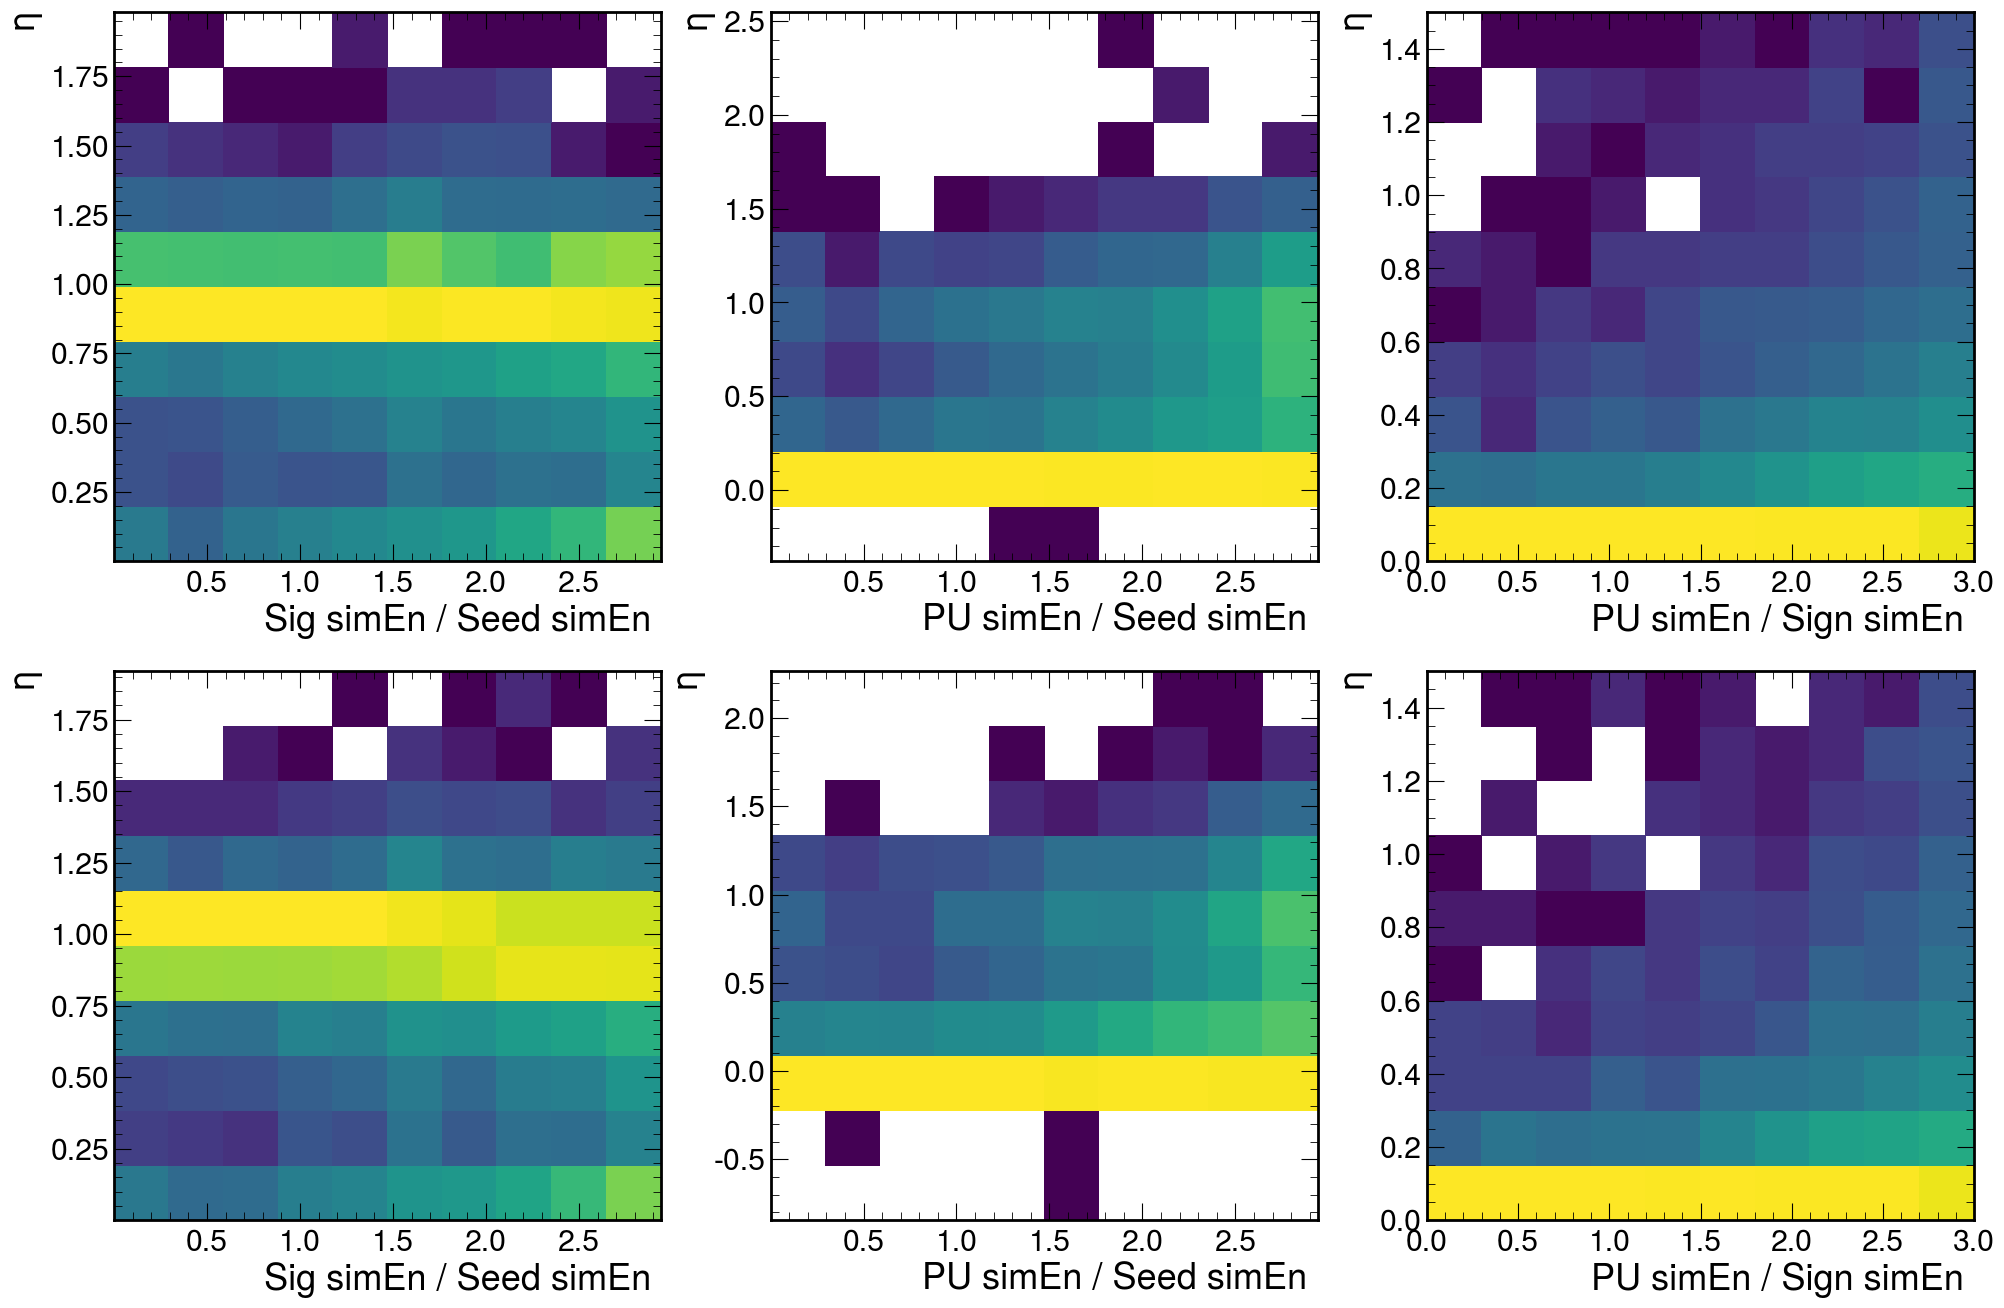

In [161]:
f, (ax1, ax2), = plt.subplots(2,3, figsize=(24,16), dpi=100)

ax1[0].hist2d(abs(dfele.eta),dfele.simen_sig_frac, label="ele", norm=colors.LogNorm())
ax1[0].legend()
ax1[0].set_xlabel("Sig simEn / Seed simEn ")
ax1[0].set_ylabel("$\eta$")

ax1[1].hist2d(abs(dfele.eta),dfele.simen_pu_frac, label="ele", norm=colors.LogNorm())
ax1[1].legend()
ax1[1].set_xlabel("PU simEn / Seed simEn ")
ax1[1].set_ylabel("$\eta$")

ax1[2].hist2d(abs(dfele.eta),dfele.PUsimen_frac, label="ele", range=((0,3),(0,1.5)),norm=colors.LogNorm())
ax1[2].legend()
ax1[2].set_xlabel("PU simEn / Sign simEn ")
ax1[2].set_ylabel("$\eta$")


ax2[0].hist2d(abs(dfgam.eta),dfgam.simen_sig_frac, label="ele", norm=colors.LogNorm())
ax2[0].legend()
ax2[0].set_xlabel("Sig simEn / Seed simEn ")
ax2[0].set_ylabel("$\eta$")

ax2[1].hist2d(abs(dfgam.eta),dfgam.simen_pu_frac, label="ele", norm=colors.LogNorm())
ax2[1].legend()
ax2[1].set_xlabel("PU simEn / Seed simEn ")
ax2[1].set_ylabel("$\eta$")

ax2[2].hist2d(abs(dfgam.eta),dfgam.PUsimen_frac, label="ele", range=((0,3),(0,1.5)),norm=colors.LogNorm())
ax2[2].legend()
ax2[2].set_xlabel("PU simEn / Sign simEn ")
ax2[2].set_ylabel("$\eta$")


In [39]:
print("Ele: frac Seed not passing PU threshold: ", len(dfele[dfele.PUsimen_frac > 0.666])/len(dfele))
print("Gamma: frac Seed not passing PU threshold: ", len(dfgam[dfgam.PUsimen_frac > 0.666])/len(dfgam))

Ele: frac Seed not passing PU threshold:  0.005615327552247205
Gamma: frac Seed not passing PU threshold:  0.0054572021841113585


# EE border effect

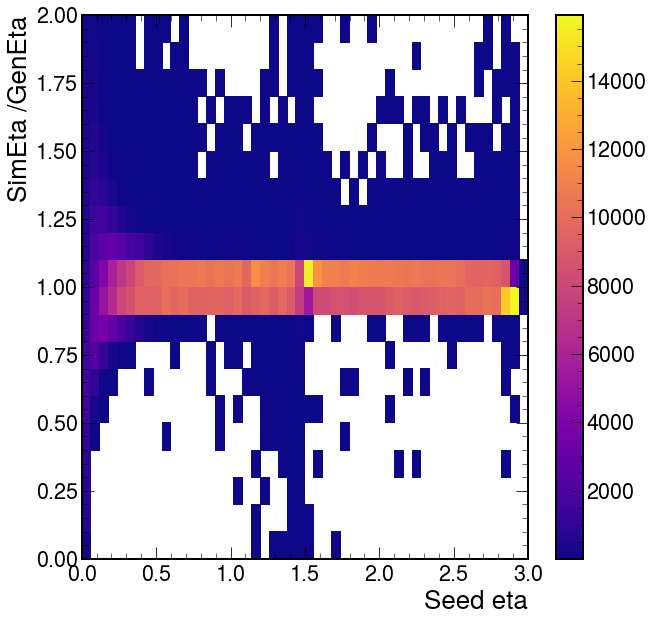

In [41]:
plt.hist2d(dfele.eta.abs(),  dfele.calo_simeta/dfele.calo_geneta, range=((0,3),(0,2)), bins=(50,20), cmap="plasma", cmin=1 )
plt.xlabel("Seed eta")
plt.ylabel("SimEta /GenEta")
plt.colorbar()

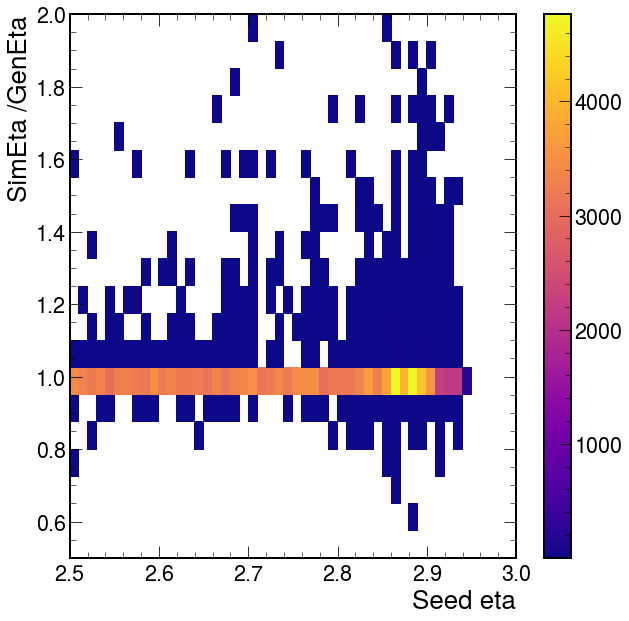

In [43]:
plt.hist2d(dfele.eta.abs(),  dfele.calo_simeta/dfele.calo_geneta, range=((2.5,3),(0.5,2)), bins=(50,20), cmap="plasma", cmin=1 )
plt.xlabel("Seed eta")
plt.ylabel("SimEta /GenEta")
plt.colorbar()

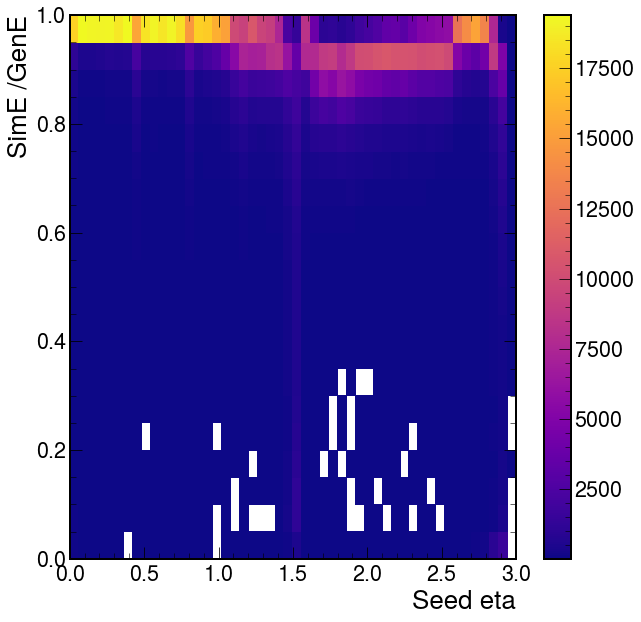

In [49]:
plt.hist2d(dfele.eta.abs(),  dfele.calo_simen/dfele.calo_genen, range=((0,3),(0,1)), bins=(50,20), cmap="plasma", cmin=1)
plt.xlabel("Seed eta")
plt.ylabel("SimE /GenE")
plt.colorbar()

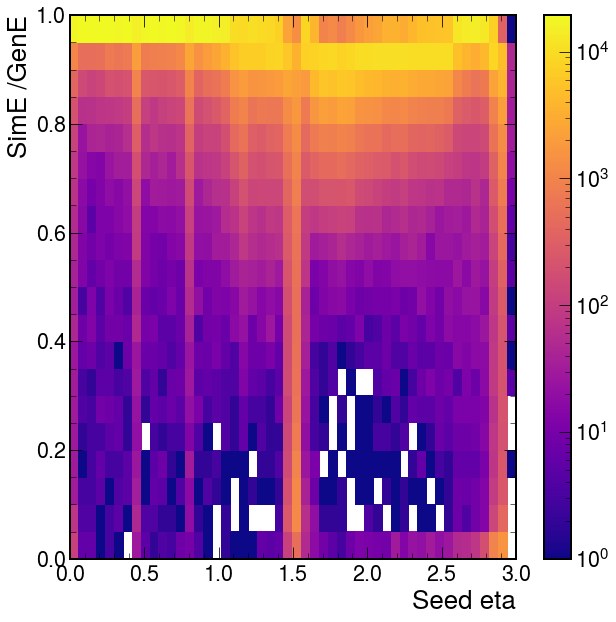

In [48]:
plt.hist2d(dfele.eta.abs(),  dfele.calo_simen/dfele.calo_genen, range=((0,3),(0,1)), bins=(50,20), cmap="plasma", cmin=1, norm=colors.LogNorm() )
plt.xlabel("Seed eta")
plt.ylabel("SimE /GenE")
plt.colorbar()

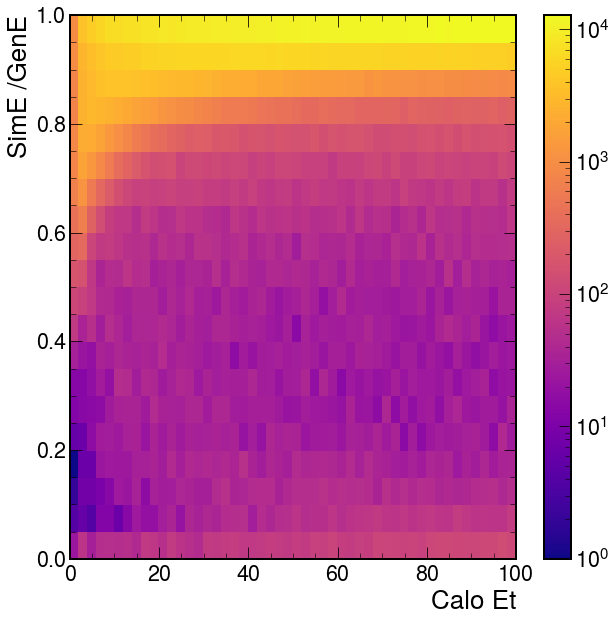

In [66]:
plt.hist2d(dfele.calo_genet,  dfele.calo_simen/dfele.calo_genen, range=((0,100),(0,1)), bins=(50,20), cmap="plasma", cmin=1, norm=colors.LogNorm() )
plt.xlabel("Calo Et")
plt.ylabel("SimE /GenE")
plt.colorbar()

/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/matplotlib/colors.py:1207: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


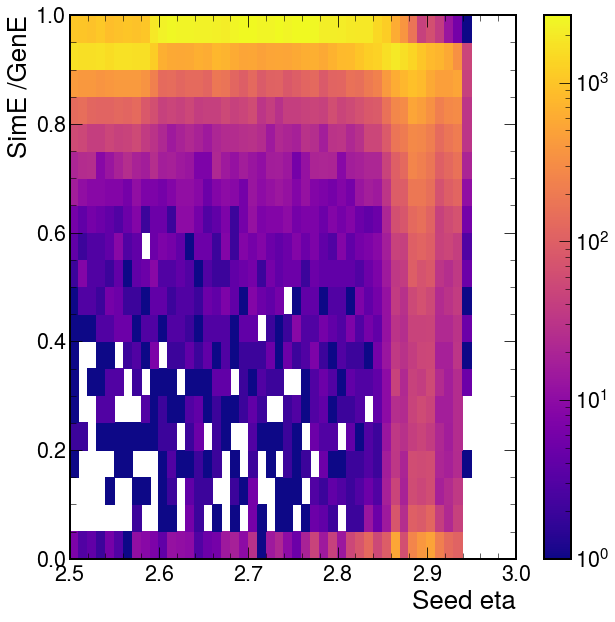

In [47]:
plt.hist2d(dfele.eta.abs(),  dfele.calo_simen/dfele.calo_genen, range=((2.5,3),(0,1)), bins=(50,20), cmap="plasma", cmin=1, norm=colors.LogNorm() )
plt.xlabel("Seed eta")
plt.ylabel("SimE /GenE")
plt.colorbar()

Text(1, 0, 'Seed ET')

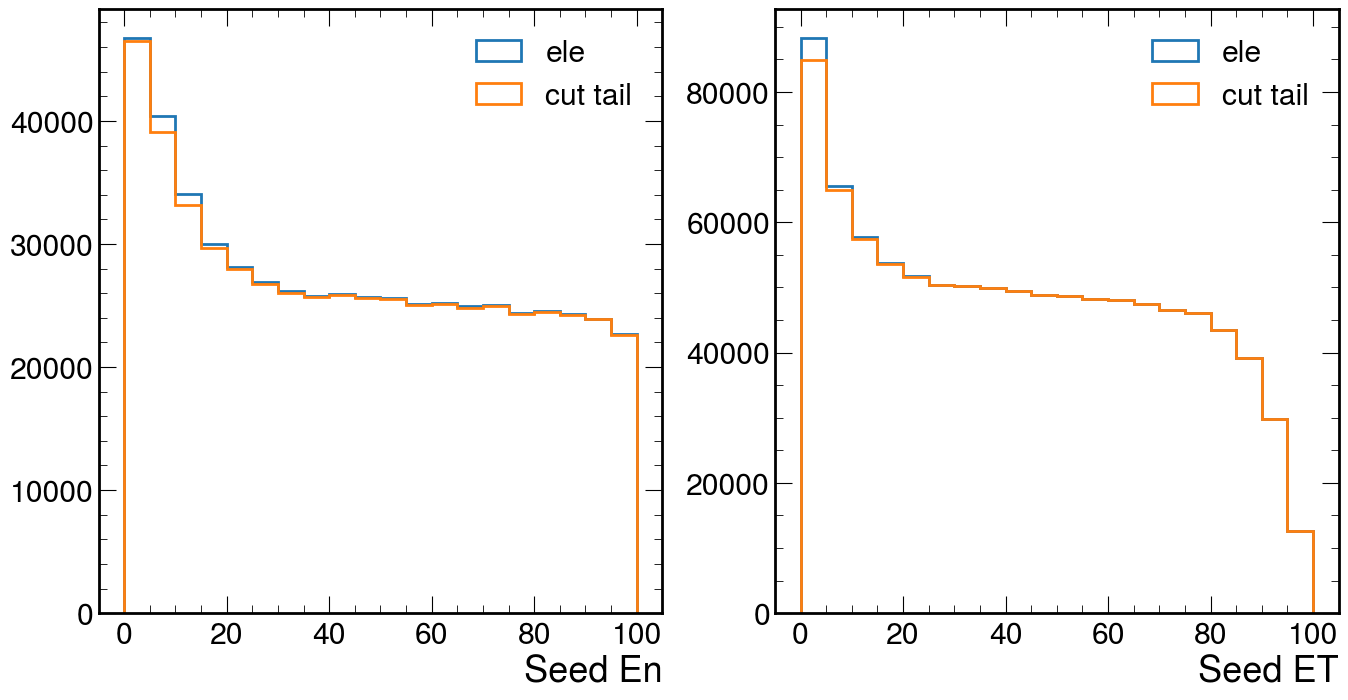

In [53]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

cut =  (( dfele.eta.abs() > 2.8) & ((dfele.calo_simen / dfele.calo_genen)> 0.4)) | ( dfele.eta.abs() <= 2.8)

ax[0].hist(dfele.en, histtype="step", linewidth=2, label="ele", bins=20, range=(0,100))
ax[0].hist(dfele[cut].en, histtype="step", linewidth=2, label="cut tail", bins=20, range=(0,100))
ax[0].legend()
ax[0].set_xlabel("Seed En")



he =  ax[1].hist(dfele.et, histtype="step", linewidth=2, label="ele", bins=20, range=(0,100))
he =  ax[1].hist(dfele[cut].et, histtype="step", linewidth=2, label="cut tail", bins=20, range=(0,100))
ax[1].legend()
# ax[1].set_yscale("log")
ax[1].set_xlabel("Seed ET")
# ax[2].hist(df.ieta)




Text(0, 1, 'iphi')

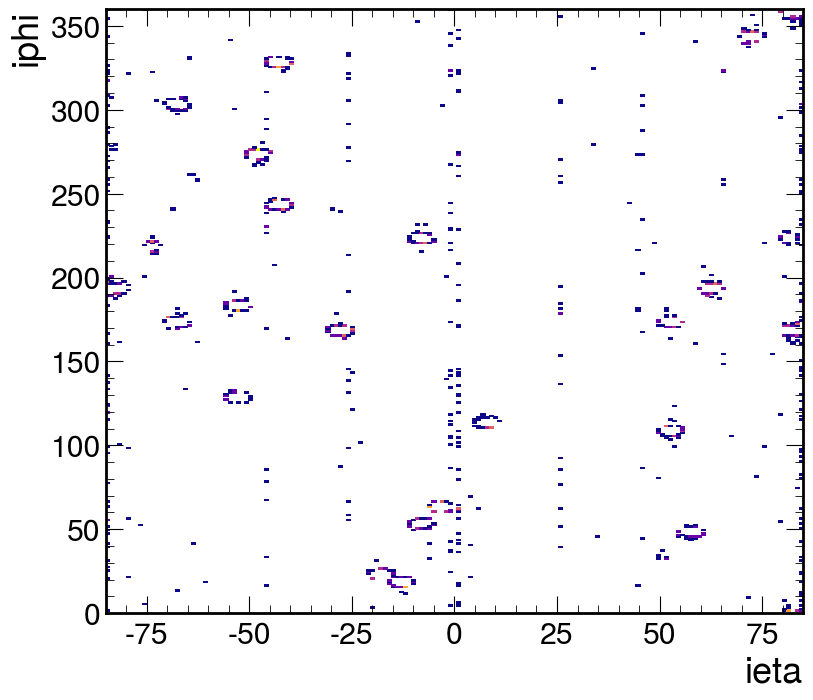

In [10]:
f, ax = plt.subplots(1,1, figsize=(9,8), dpi=100, sharey=True)

ax.hist2d(dfele[(dfele.iz==0) & (dfele.et < 20) & (dfele.calo_genet > 80)].ieta, dfele[(dfele.iz==0) & (dfele.et < 20) & (dfele.calo_genet > 80)].iphi, range=((-85,85),(0,360)), bins=(171,360), cmap="plasma", cmin=1 )
ax.set_xlabel("ieta")
ax.set_ylabel("iphi")

Text(0, 1, 'iphi')

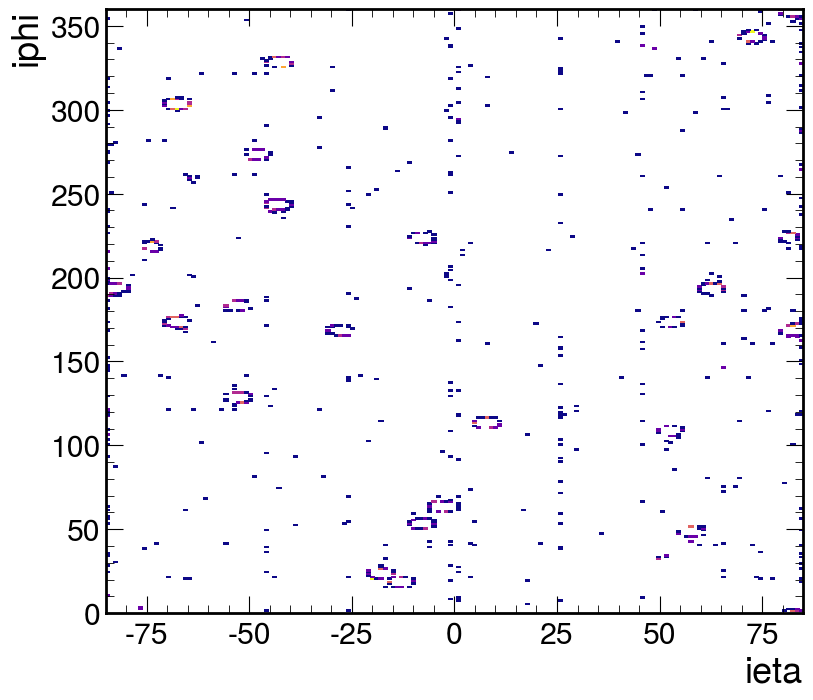

In [12]:
f, ax = plt.subplots(1,1, figsize=(9,8), dpi=100, sharey=True)

ax.hist2d(dfgam[(dfgam.iz==0) & (dfgam.et < 20) & (dfgam.calo_genet > 80)].ieta, dfgam[(dfgam.iz==0) & (dfgam.et < 20) & (dfgam.calo_genet > 80)].iphi, range=((-85,85),(0,360)), bins=(171,360), cmap="plasma", cmin=1 )
ax.set_xlabel("ieta")
ax.set_ylabel("iphi")

[None]

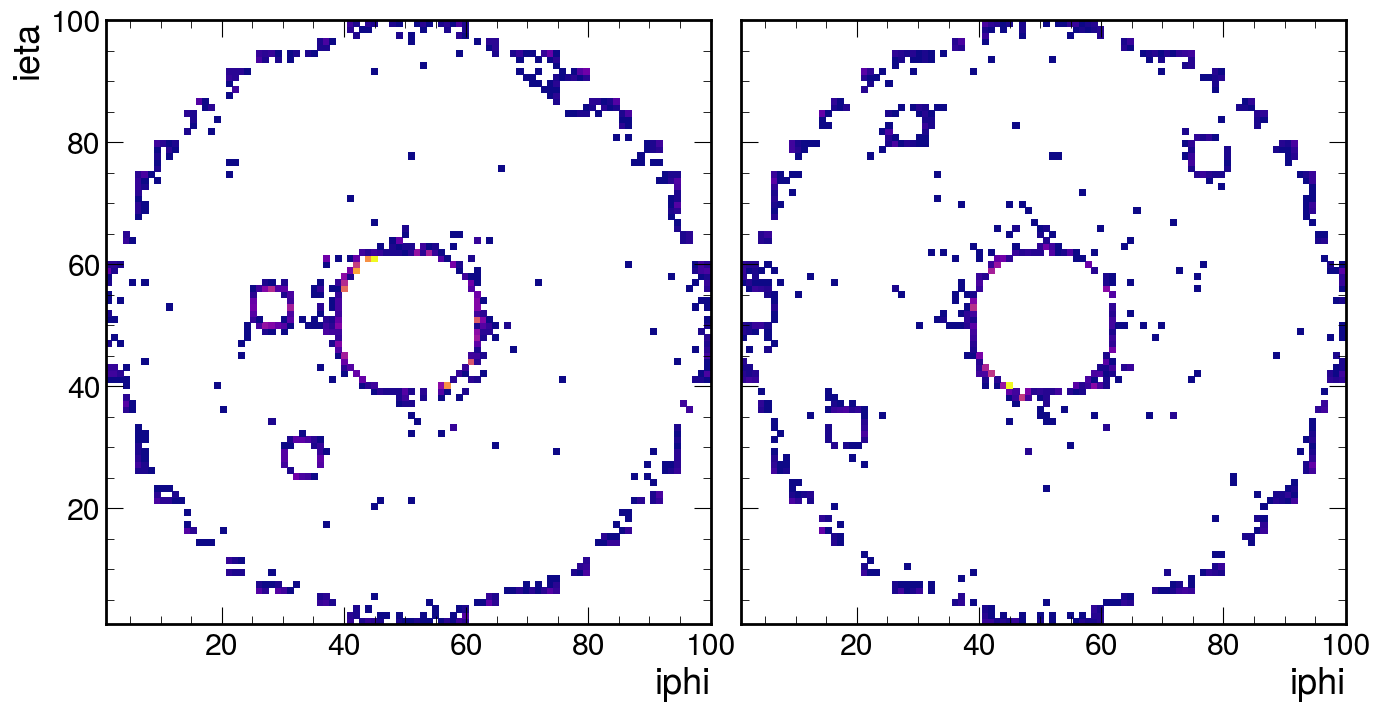

In [77]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100, sharey=True)

ax[0].hist2d(dfele[(dfele.iz==-1) & (dfele.et < 20) & (dfele.calo_genet>80)].iphi,dfele[(dfele.iz==-1) & (dfele.et < 20)& (dfele.calo_genet>80)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma", cmin = 1 )
ax[1].hist2d(dfele[(dfele.iz==1) & (dfele.et < 20)& (dfele.calo_genet>80)].iphi,dfele[(dfele.iz==1) & (dfele.et < 20)& (dfele.calo_genet>80)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma",cmin = 1 )
ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
# ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")
[plt.subplots_adjust(wspace=.05)]

[None]

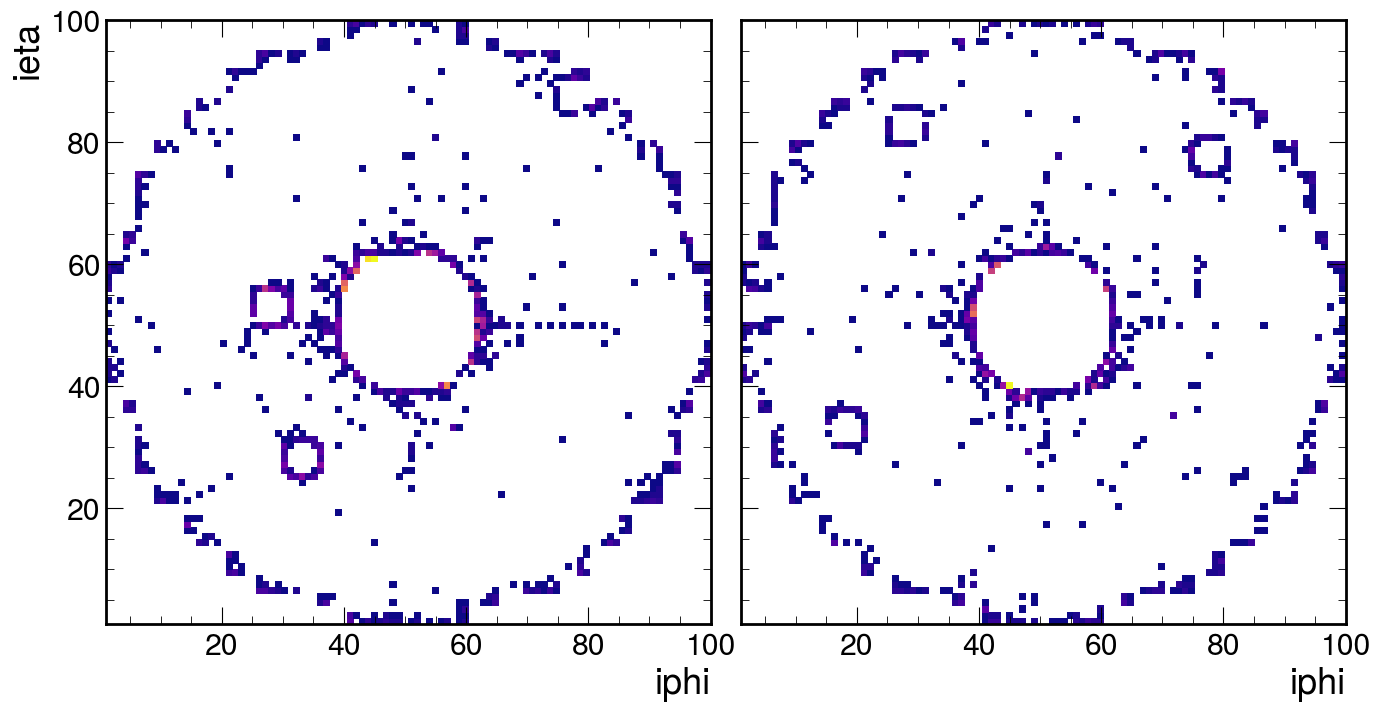

In [13]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100, sharey=True)

ax[0].hist2d(dfgam[(dfgam.iz==-1) & (dfgam.et < 20) & (dfgam.calo_genet>80)].iphi,dfgam[(dfgam.iz==-1) & (dfgam.et < 20)& (dfgam.calo_genet>80)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma", cmin = 1 )
ax[1].hist2d(dfgam[(dfgam.iz==1) & (dfgam.et < 20)& (dfgam.calo_genet>80)].iphi,dfgam[(dfgam.iz==1) & (dfgam.et < 20)& (dfgam.calo_genet>80)].ieta, range=((1,100),(1,100)), bins=(100,100), cmap="plasma",cmin = 1 )
ax[0].set_ylabel("ieta")
ax[0].set_xlabel("iphi")
# ax[1].set_ylabel("ieta")
ax[1].set_xlabel("iphi")
[plt.subplots_adjust(wspace=.05)]

Text(0, 1, 'Calo gen Et')

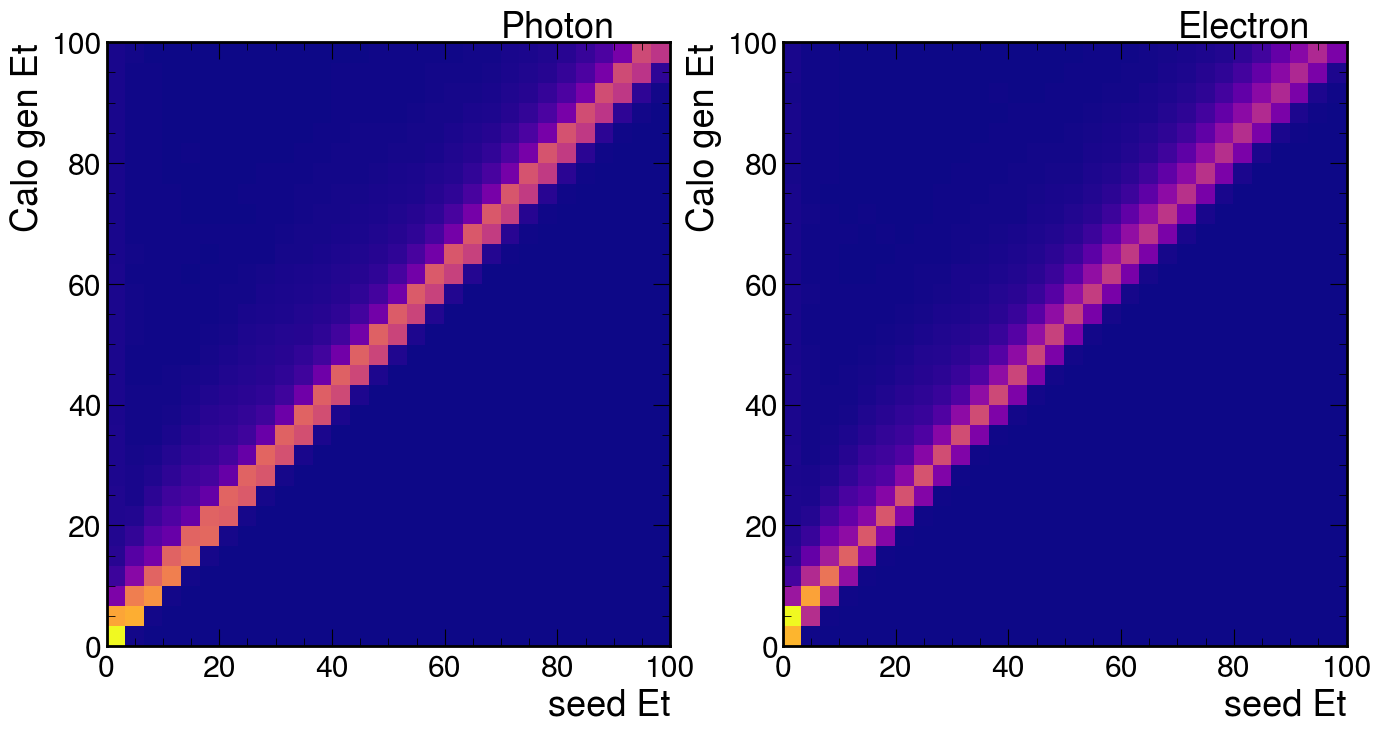

In [28]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfgam.et , dfgam.calo_genet, range=((0,100),(0,100)), bins=(30,30), cmap='plasma')
ax[1].hist2d(dfele.et , dfele.calo_genet, range=((0,100),(0,100)), bins=(30,30), cmap='plasma')
ax[0].set_xlabel("seed Et")
ax[1].set_xlabel("seed Et")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)
ax[0].set_ylabel("Calo gen Et")
ax[1].set_ylabel("Calo gen Et")

Text(0, 1, 'Calo gen Et')

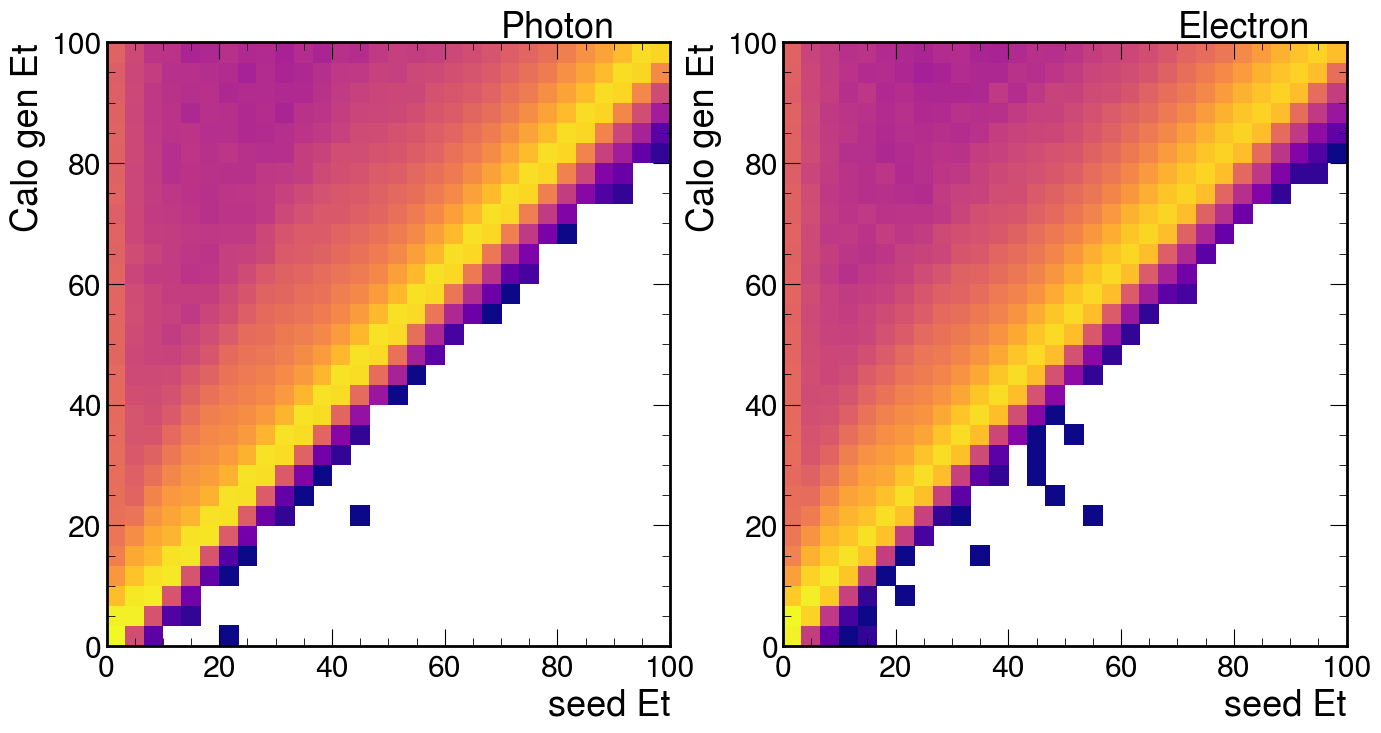

In [27]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfgam.et , dfgam.calo_genet, range=((0,100),(0,100)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.et , dfele.calo_genet, range=((0,100),(0,100)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("seed Et")
ax[1].set_xlabel("seed Et")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("Calo gen Et")
ax[1].set_ylabel("Calo gen Et")

Text(0, 1, 'Calo Sim $\\eta$')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


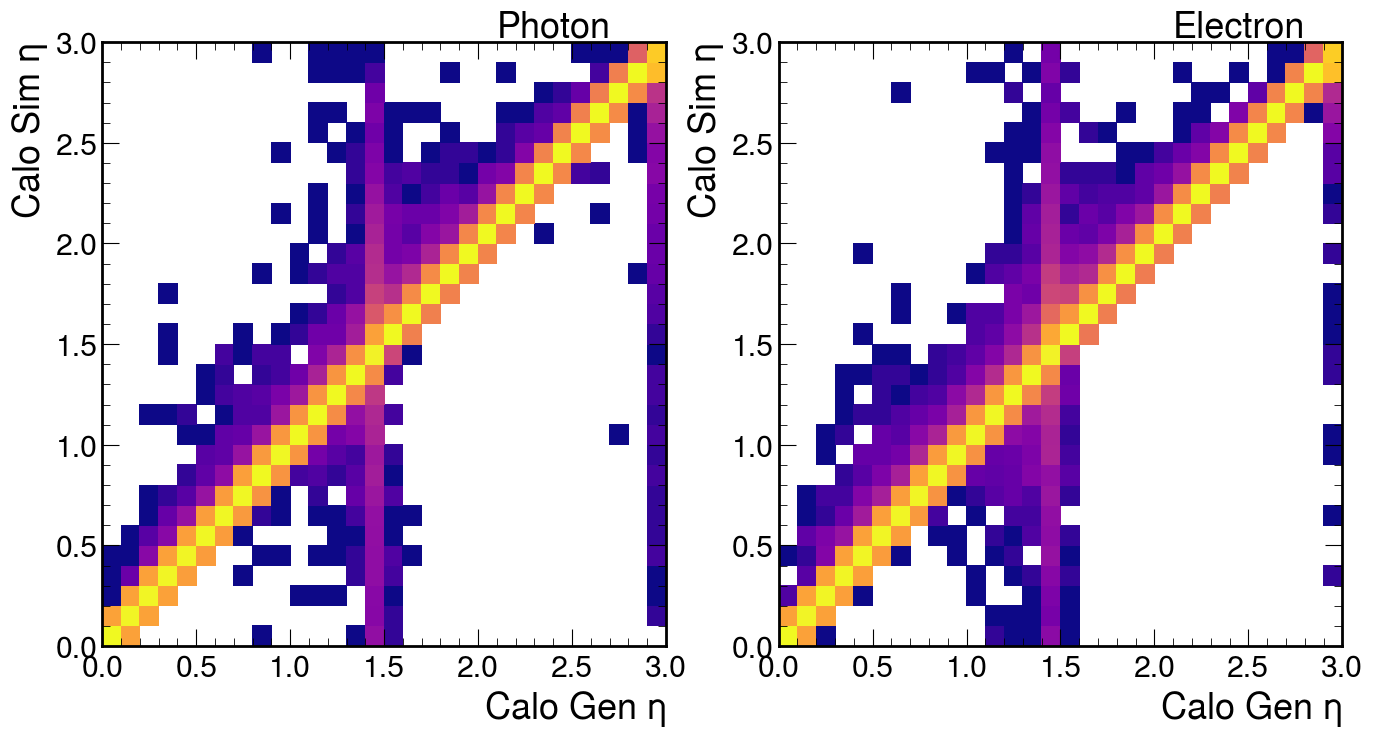

In [32]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfgam.calo_geneta.abs() , dfgam.calo_simeta.abs(), range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.calo_geneta.abs() , dfele.calo_simeta.abs(), range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("Calo Gen $\eta$")
ax[1].set_xlabel("Calo Gen $\eta$")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("Calo Sim $\eta$")
ax[1].set_ylabel("Calo Sim $\eta$")

Text(0, 1, 'Calo Sim $\\phi$')

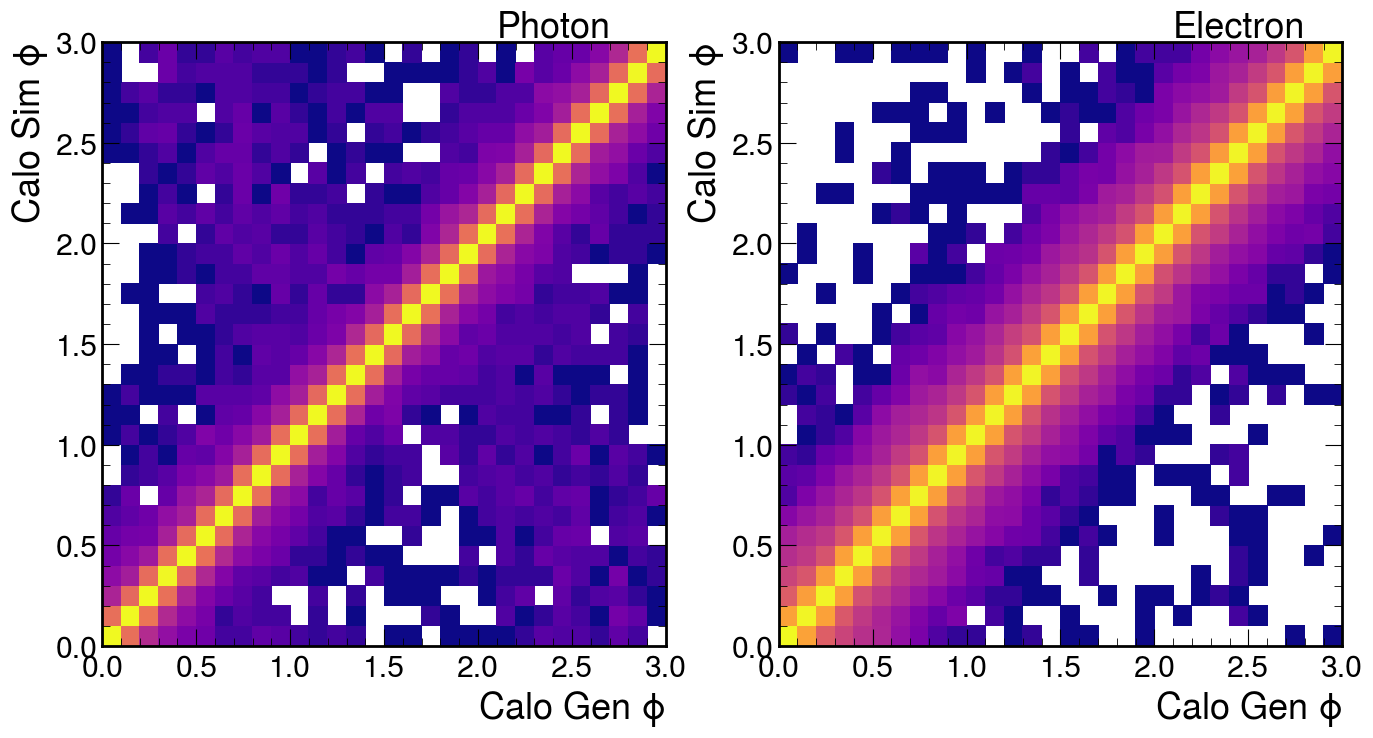

In [34]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfgam.calo_genphi.abs() , dfgam.calo_simphi.abs(), range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.calo_genphi.abs() , dfele.calo_simphi.abs(), range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("Calo Gen $\phi$")
ax[1].set_xlabel("Calo Gen $\phi$")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("Calo Sim $\phi$")
ax[1].set_ylabel("Calo Sim $\phi$")

Text(0, 1, 'Calo Sim $\\phi$')

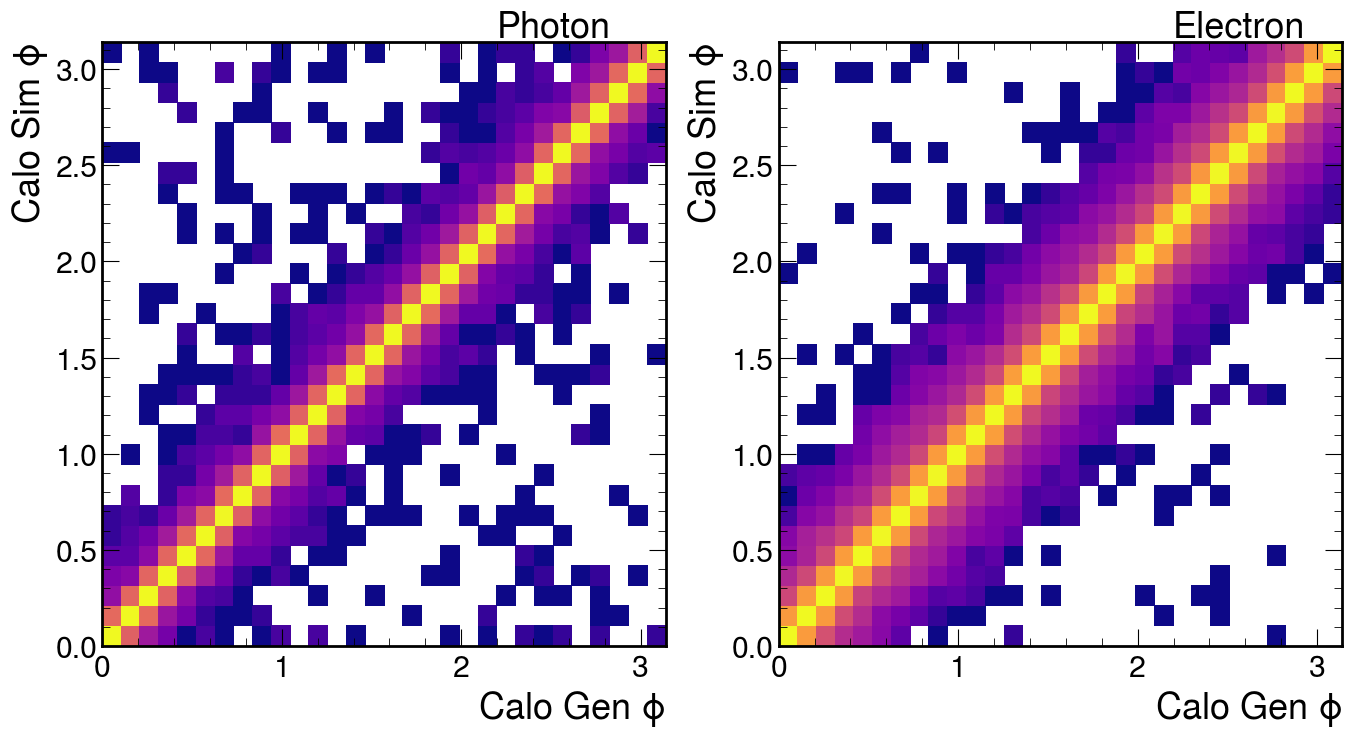

In [35]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(dfgam.calo_genphi , dfgam.calo_simphi, range=((0,3.14),(0,3.14)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.calo_genphi , dfele.calo_simphi, range=((0,3.14),(0,3.14)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("Calo Gen $\phi$")
ax[1].set_xlabel("Calo Gen $\phi$")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("Calo Sim $\phi$")
ax[1].set_ylabel("Calo Sim $\phi$")

Text(0, 1, '| Calo Sim $\\eta$ - Seed $\\eta$|')

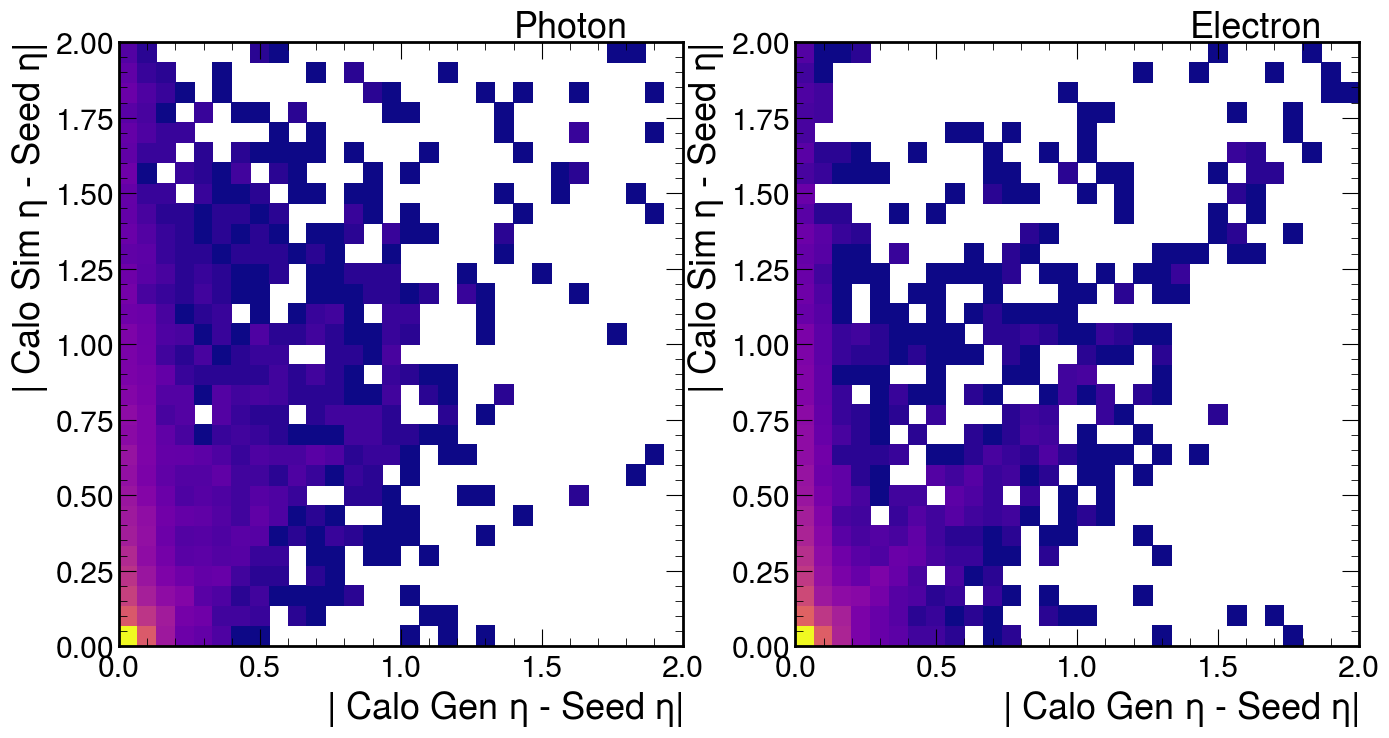

In [39]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d(abs(dfgam.calo_geneta - dfgam.eta) , abs(dfgam.calo_simeta - dfgam.eta), range=((0,2),(0,2)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(abs(dfele.calo_geneta - dfele.eta) , abs(dfele.calo_simeta - dfele.eta), range=((0,2),(0,2)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("| Calo Gen $\eta$ - Seed $\eta$|")
ax[1].set_xlabel("| Calo Gen $\eta$ - Seed $\eta$|")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("| Calo Sim $\eta$ - Seed $\eta$|")
ax[1].set_ylabel("| Calo Sim $\eta$ - Seed $\eta$|")

Text(0, 1, '| Calo Gen $\\eta$ - Seed $\\eta$|')

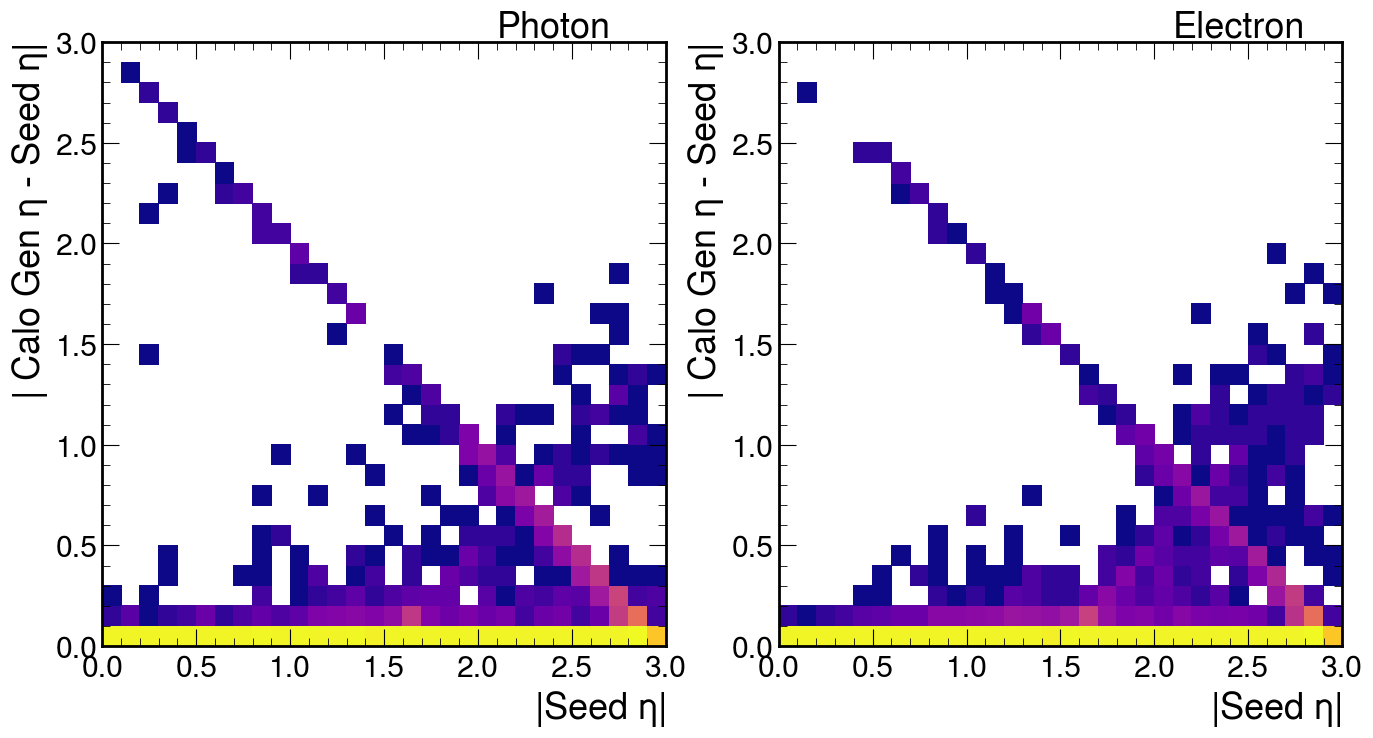

In [42]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d( dfgam.eta.abs(), abs(dfgam.calo_geneta - dfgam.eta) ,range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.eta.abs(), abs(dfele.calo_geneta - dfele.eta) ,  range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("|Seed $\eta$|")
ax[1].set_xlabel("|Seed $\eta$|")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("| Calo Gen $\eta$ - Seed $\eta$|")
ax[1].set_ylabel("| Calo Gen $\eta$ - Seed $\eta$|")

Text(0, 1, '| Calo Sim $\\eta$ - Seed $\\eta$|')

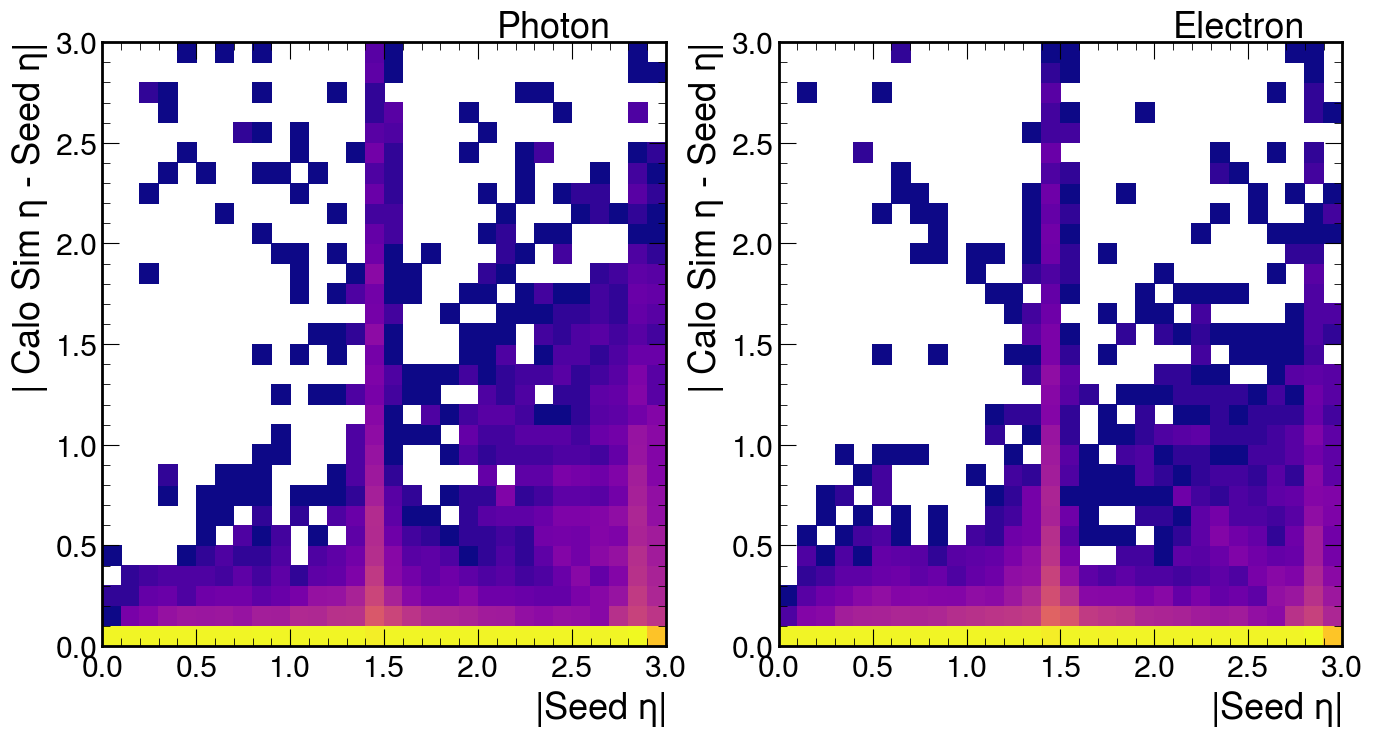

In [43]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d( dfgam.eta.abs(), abs(dfgam.calo_simeta - dfgam.eta) ,range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.eta.abs(), abs(dfele.calo_simeta - dfele.eta) ,  range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("|Seed $\eta$|")
ax[1].set_xlabel("|Seed $\eta$|")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("| Calo Sim $\eta$ - Seed $\eta$|")
ax[1].set_ylabel("| Calo Sim $\eta$ - Seed $\eta$|")

Text(0, 1, '| Calo Gen $\\phi$ - Seed $\\phi$|')

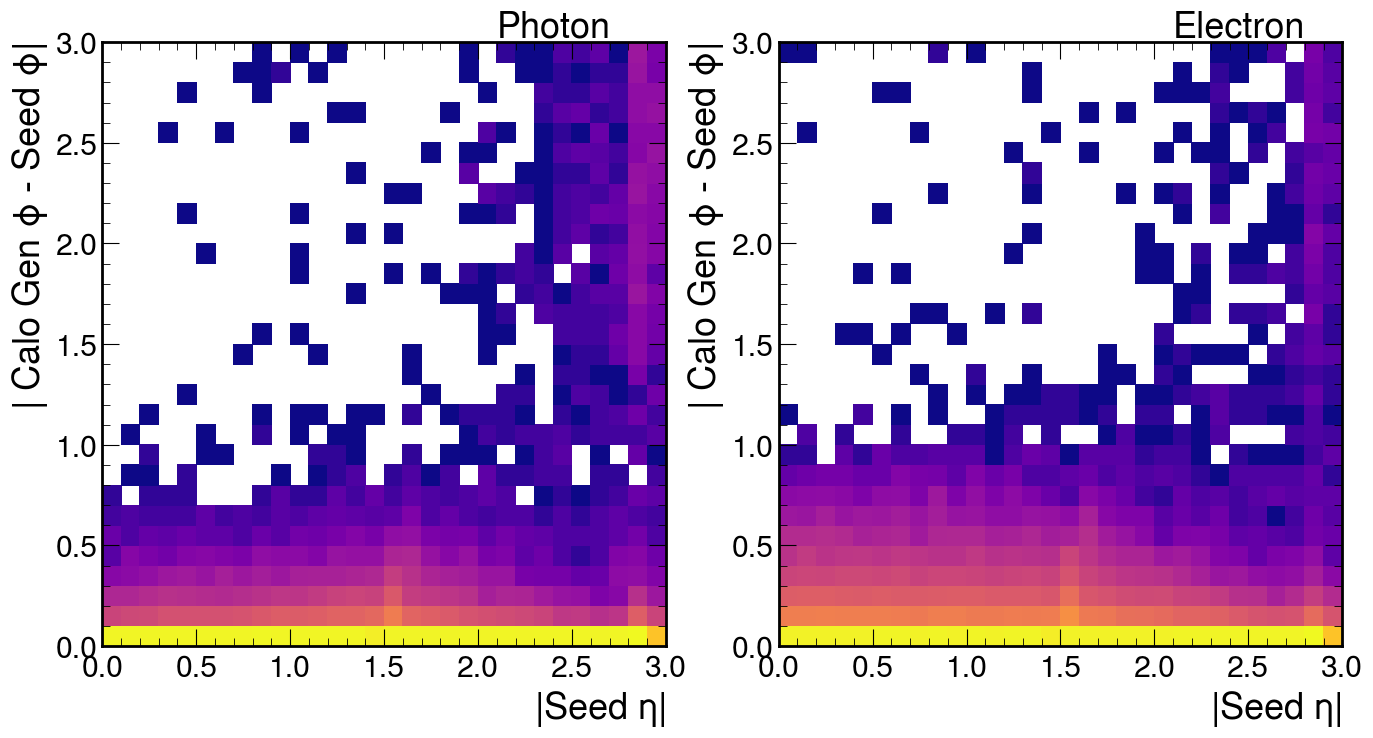

In [46]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d( dfgam.eta.abs(), abs(dfgam.calo_genphi - dfgam.phi) ,range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.eta.abs(), abs(dfele.calo_genphi- dfele.phi) ,  range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("|Seed $\eta$|")
ax[1].set_xlabel("|Seed $\eta$|")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("| Calo Gen $\phi$ - Seed $\phi$|")
ax[1].set_ylabel("| Calo Gen $\phi$ - Seed $\phi$|")

Text(0, 1, '| Calo Sim $\\phi$ - Seed $\\phi$|')

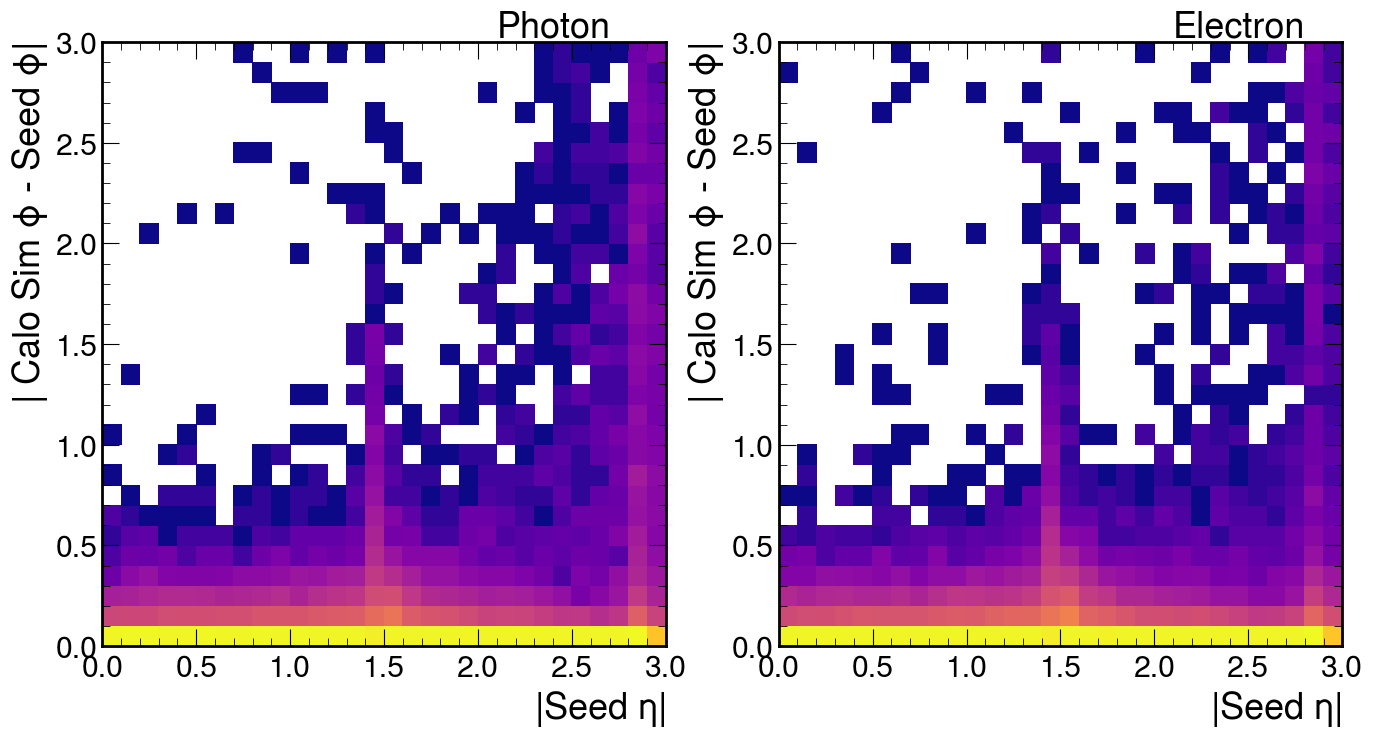

In [47]:
f, ax, = plt.subplots(1,2, figsize=(16,8), dpi=100)

ax[0].hist2d( dfgam.eta.abs(), abs(dfgam.calo_simphi - dfgam.phi) ,range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[1].hist2d(dfele.eta.abs(), abs(dfele.calo_simphi- dfele.phi) ,  range=((0,3),(0,3)), bins=(30,30), cmap='plasma', norm=colors.LogNorm())
ax[0].set_xlabel("|Seed $\eta$|")
ax[1].set_xlabel("|Seed $\eta$|")
ax[0].text(0.7,1.01, "Photon", transform=ax[0].transAxes)
ax[1].text(0.7,1.01, "Electron", transform=ax[1].transAxes)

ax[0].set_ylabel("| Calo Sim $\phi$ - Seed $\phi$|")
ax[1].set_ylabel("| Calo Sim $\phi$ - Seed $\phi$|")